# 1、导包与数据挖掘
## 1.1 导包

In [2]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

# 模型

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RepeatedKFold,cross_val_score,cross_val_predict,KFold
from sklearn.metrics import make_scorer,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import LinearSVR,SVR
from sklearn.neighbors  import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler

## 1.2 数据载入

In [4]:
# 加载数据
data_train = pd.read_csv('./zhengqi_train.txt', sep = '\t')
data_test = pd.read_csv('./zhengqi_test.txt', sep = '\t')

## 1.3 数据合并

In [5]:
# 合并训练数据和测试数据
data_train["oringin"] = "train"
data_test["oringin"] = "test"
data_all = pd.concat([data_train, data_test], axis = 0,ignore_index = True)
# 显示前5条数据
data_all.head()

,V0,V1,V10,V11,V12,V13,V14,V15,V16,V17,...,V36,V37,V4,V5,V6,V7,V8,V9,oringin,target
0,0.566,0.016,-0.940,-0.307,-0.073,0.550,-0.484,0.000,-1.707,-1.162,...,-2.608,-3.508,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,train,0.175
1,0.968,0.437,0.188,-0.455,-0.134,1.109,-0.488,0.000,-0.977,-1.162,...,-0.335,-0.730,0.194,-0.893,-1.566,-2.360,0.332,-2.114,train,0.676
2,1.013,0.568,0.874,-0.051,-0.072,0.767,-0.493,-0.212,-0.618,-0.897,...,0.765,-0.589,0.112,-0.797,-1.367,-2.360,0.396,-2.114,train,0.633
3,0.733,0.368,0.011,0.102,-0.014,0.769,-0.371,-0.162,-0.429,-0.897,...,0.333,-0.112,0.599,-0.679,-1.200,-2.086,0.403,-2.114,train,0.206
4,0.684,0.638,-0.251,0.570,0.199,-0.349,-0.342,-0.138,-0.391,-0.897,...,-0.280,-0.028,0.337,-0.454,-1.073,-2.086,0.314,-2.114,train,0.384


## 1.4 数据分布

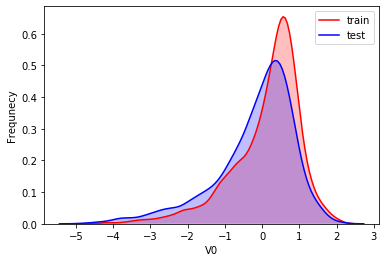

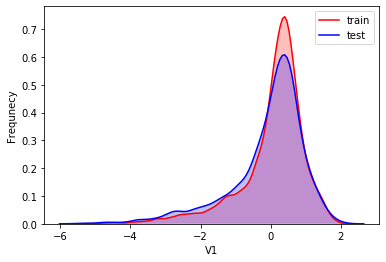

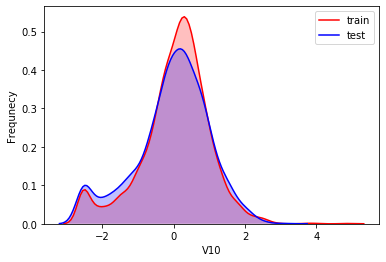

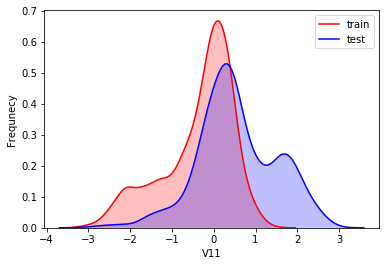

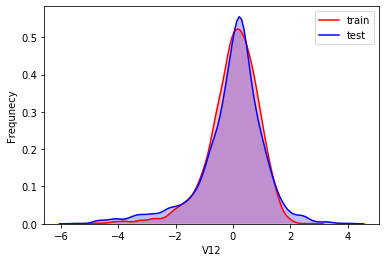

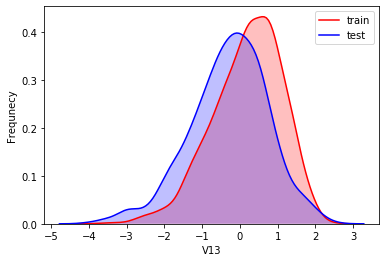

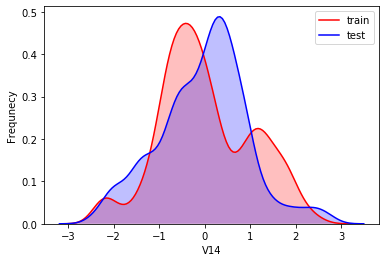

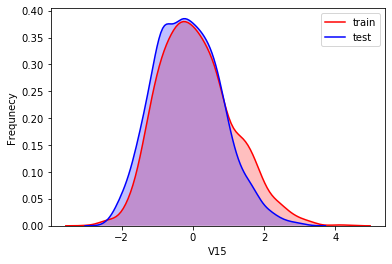

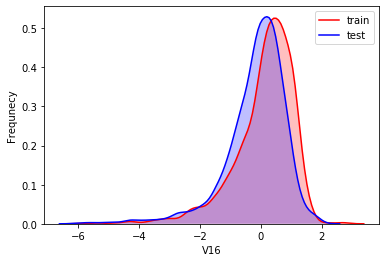

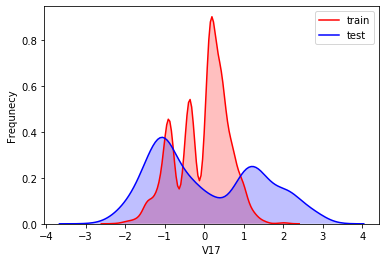

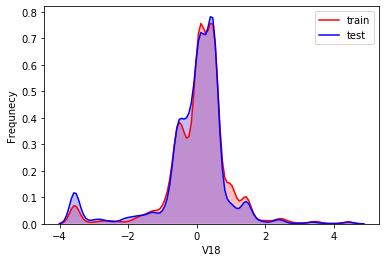

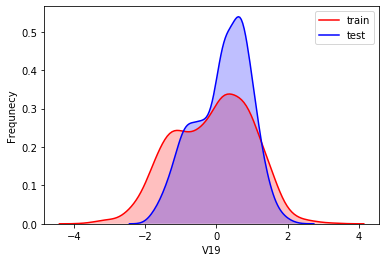

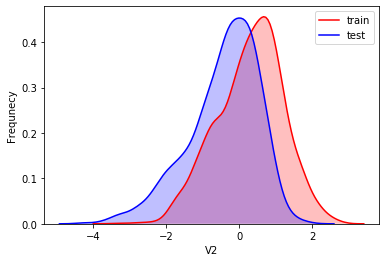

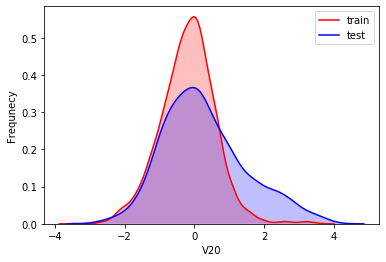

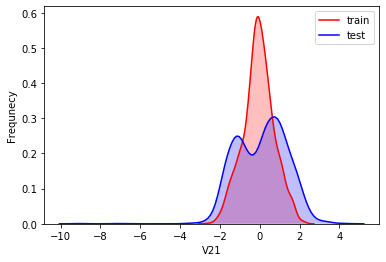

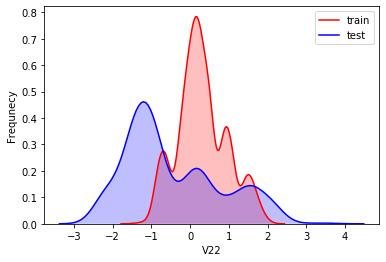

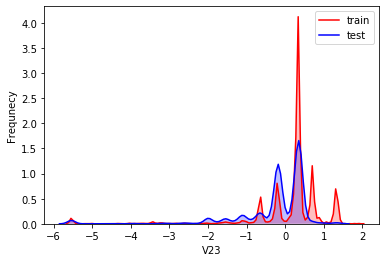

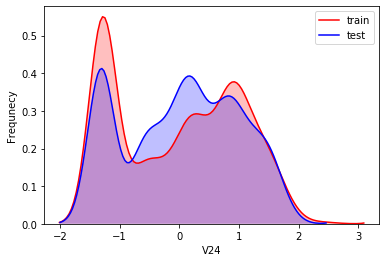

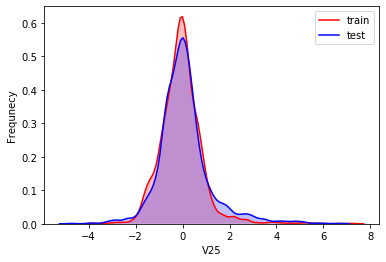

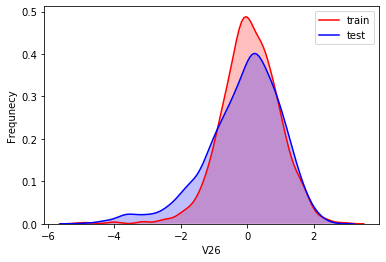

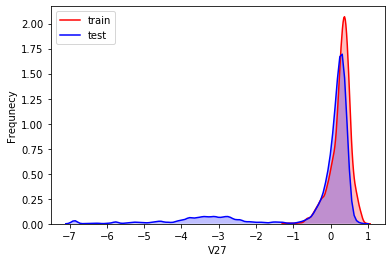

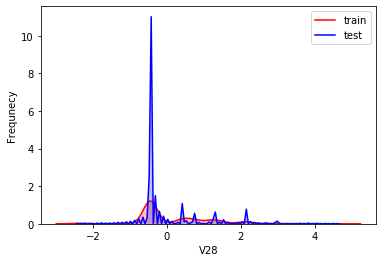

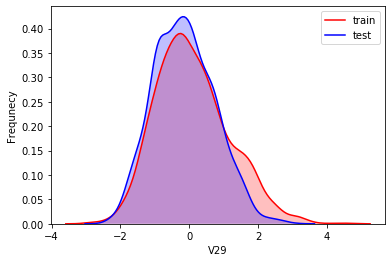

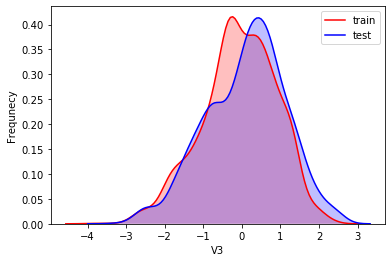

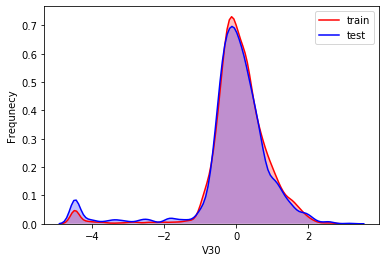

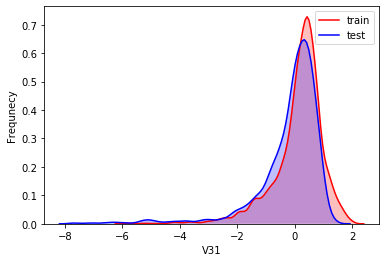

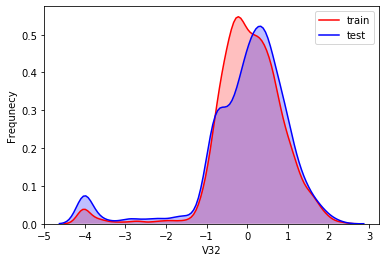

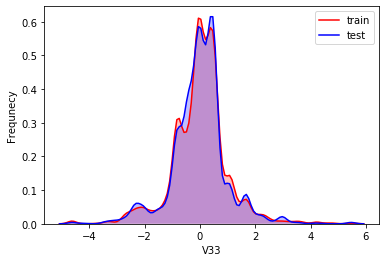

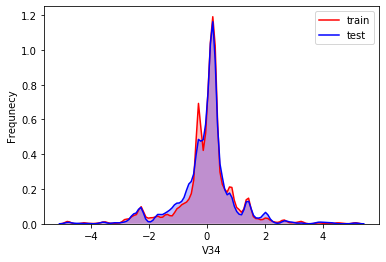

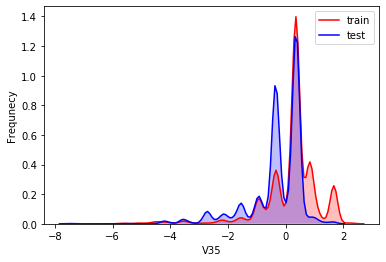

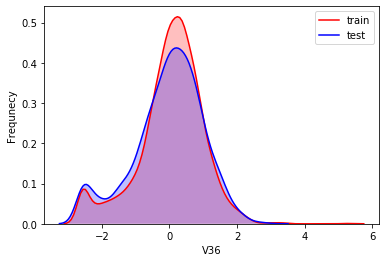

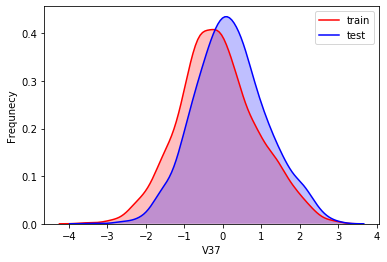

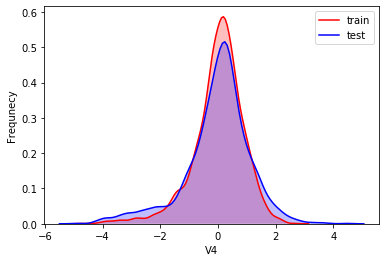

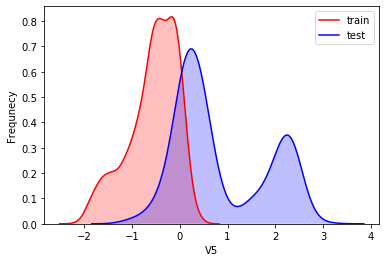

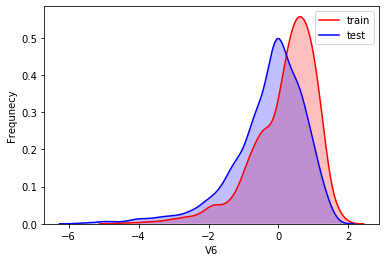

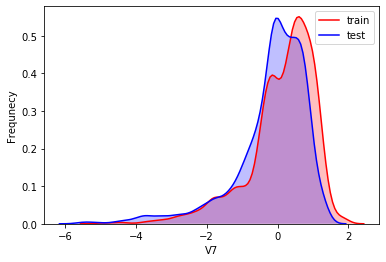

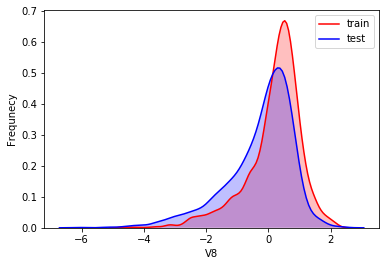

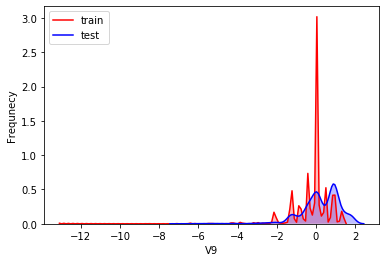

In [6]:
# 探索数据分布
# fig = plt.figure(figsize = (6, 6))
for column in data_all.columns[0: -2]:
    g = sns.kdeplot(data_all[column][(data_all["oringin"] == "train")], color = "red", shade = "True")
    g = sns.kdeplot(data_all[column][data_all["oringin"] == "test"], ax = g, color = "Blue", shade = "True")
    g.set_xlabel(column)
    g.set_ylabel("Frequnecy")
    g = g.legend(["train", "test"])
    plt.show()

## 1.5 特征清洗

In [10]:
# 删除特征“V5”，“V9”，“V11”，“V17”， “V22”， “V28”，训练集和测试集分布不均
for column in ["V5","V9", "V11", "V17", "V22", "V28"]:
#     print(column)
    g = sns.kdeplot(data_all[column][(data_all["oringin"] == "train")], color = "Red", shade = True)
    g = sns.kdeplot(data_all[column][(data_all["oringin"] == "test")], ax = g, color = "Blue", shade = True)
    g.set_xlabel(column)
    g.set_ylabel("Frequency")
    g = g.legend(["train", "test"])
    plt.show()

data_all.drop(["V5","V9", "V11", "V17", "V22", "V28"], axis = 1, inplace = False)

KeyError: 'V5'

In [9]:
# 删除特征“V5”，“V9”，“V11”，“V17”， “V22”， “V28”，训练集和测试集分布不均
for column in ["V5","V9", "V11", "V17", "V22", "V28"]:
#     g = sns.kdeplot(data_all[column][(data_all["oringin"] == "train")], color = "Red", shade = True)
#     g = sns.kdeplot(data_all[column][(data_all["oringin"] == "test")], ax = g, color = "Blue", shade = True)
#     g.set_xlabel(column)
#     g.set_ylabel("Frequency")
#     g = g.legend(["train", "test"])
#     plt.show()

# data_all.drop(["V5","V9", "V11", "V17", "V22", "V28"], axis = 1, inplace = True)

KeyError: 'V5'

## 1.6 特征可视化

In [ ]:
data_train1 = data_all[data_all["oringin"] == "train"].drop("oringin", axis = 1)

fcols 